In [1]:
import matplotlib
import pandas as pd
import seaborn as sbn
from matplotlib.ticker import MaxNLocator

In [2]:
%matplotlib inline

In [3]:
recipes_info_df = pd.read_csv('out/recipes_info.csv')

In [4]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [5]:
recipes_df = pd.concat([recipes_info_df, recipes_data_df], axis=1)

In [6]:
mean_by_year_df = recipes_df.groupby('year').mean()

In [72]:
lang_cols = [
    'num_ingredients',
    'num_techniques',
]

In [73]:
ingr_cols = [c for c in recipes_df if c.startswith('i_')]
tech_cols = [c for c in recipes_df if c.startswith('t_')]

In [81]:
count_ingr_by_year_sr = recipes_df.groupby('year')[ingr_cols].max().apply(sum, axis=1)
count_tech_by_year_sr = recipes_df.groupby('year')[tech_cols].max().apply(sum, axis=1)

In [84]:
count_lang_by_year_df = pd.concat([count_ingr_by_year_sr, count_tech_by_year_sr], axis=1)
count_lang_by_year_df.columns = lang_cols

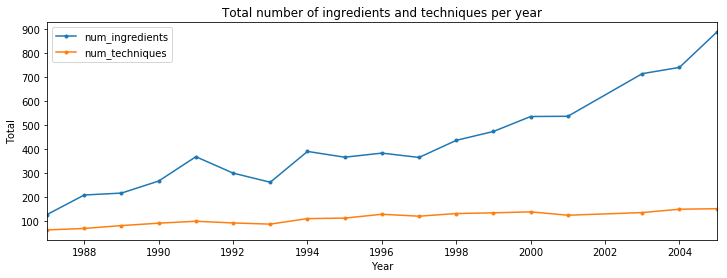

In [88]:
ax = count_lang_by_year_df.plot(
    figsize=(12, 4),
    title = 'Total number of ingredients and techniques per year',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Total')
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [7]:
top_metr_cols = [
    'num_ingredients',
    'num_techniques',
#     'num_worlds',
    'num_preparations',
]

In [8]:
mean_metrics_by_year_df = mean_by_year_df[top_metr_cols]

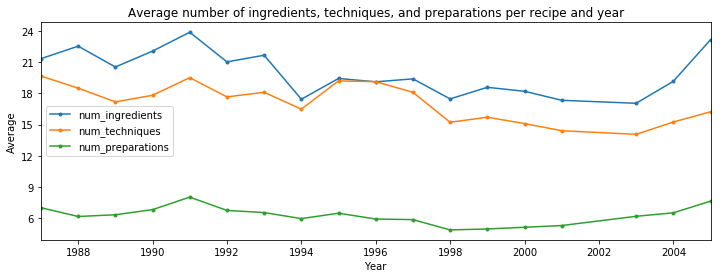

In [9]:
ax = mean_metrics_by_year_df.plot(
    figsize=(12, 4),
    title = 'Average number of ingredients, techniques, and preparations per recipe and year',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Average')
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

Conclusions:<br>
There are peaks in 1991 and 2005. Therefore, these metrics do not explain the creativity increase on their own.

In [10]:
worlds_cols = [
    'w_SALADO',
    'w_DULCE',
]

In [11]:
mean_worlds_by_year_df = mean_by_year_df[worlds_cols]

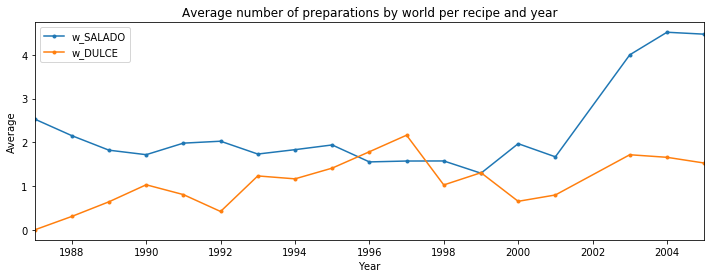

In [12]:
ax = mean_worlds_by_year_df.plot(
    figsize=(12, 4),
    title = 'Average number of preparations by world per recipe and year',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Average');

In [13]:
top_sweet_ingredients = [
    'i_azúcar',
    'i_isomalt',
]

In [14]:
mean_top_sweet_ingredients_by_year_df = mean_by_year_df[top_sweet_ingredients] * 100

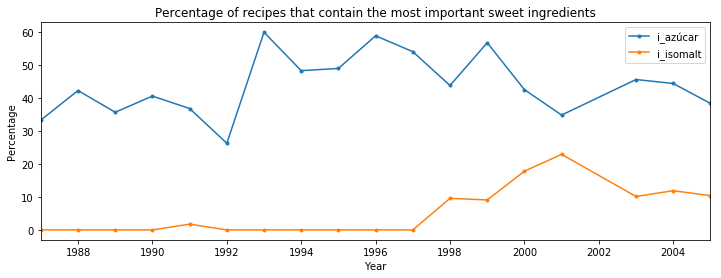

In [15]:
ax = mean_top_sweet_ingredients_by_year_df.plot(
    figsize=(12, 4),
    title = 'Percentage of recipes that contain the most representative sweet ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');

In [16]:
top_savory_ingredients = [
    'i_sal',
    'i_sal maldon',
]

In [17]:
mean_top_savory_ingredients_by_year_df = mean_by_year_df[top_savory_ingredients] * 100

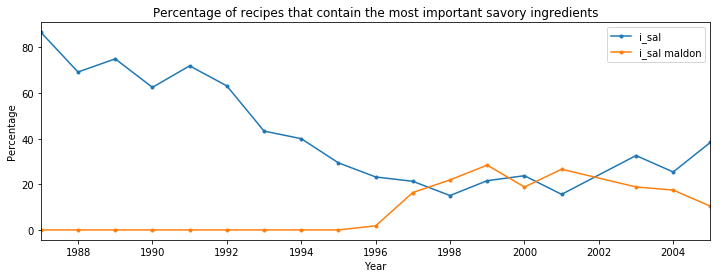

In [18]:
ax = mean_top_savory_ingredients_by_year_df.plot(
    figsize=(12, 4),
    title = 'Percentage of recipes that contain the most representative savory ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');

In [19]:
top_other_ingredients = [
    'i_agar',
    'i_agua',
#     'i_agar-agar en polvo',
#     'i_azúcar',
#     'i_sal',
    'i_hoja de gelatina',
    'i_perifollo',
    'i_aceite de oliva',
#     'i_sal maldon',
#     'i_glucosa',
#     'i_nata líquida',
#     'i_mantequilla',
#     'i_aceite',
#     'i_cebollino fresco',
#     'i_aceite de girasol',
#     'i_nata',
#     'i_harina de trigo',
#     'i_limón',
#     'i_claras de huevo',
#     'i_isomalt',
]

In [20]:
mean_top_other_ingredients_by_year_df = mean_by_year_df[top_other_ingredients] * 100

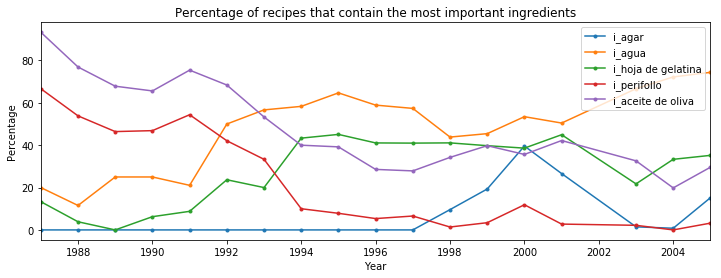

In [21]:
ax = mean_top_other_ingredients_by_year_df.plot(
    figsize=(12, 4),
    title = 'Percentage of recipes that contain the most important ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');

Conclusions:<br>
Description of the graphics. (Importance in terms of prediction.)

In [22]:
top_techniques = [
    't_hervir',
    't_pasar',
    't_cocer',
    't_horno',
    't_triturar',
#     't_mezclar',
#     't_estirar',
#     't_reposar',
#     't_pelar',
#     't_colar',
#     't_secar',
#     't_escurrir',
#     't_disolver',
#     't_escaldar',
#     't_sal',
#     't_puré',
#     't_agua',
#     't_sartén',
#     't_espuma',
#     't_montar',
]

In [23]:
mean_top_techniques_by_year_df = mean_by_year_df[top_techniques] * 100

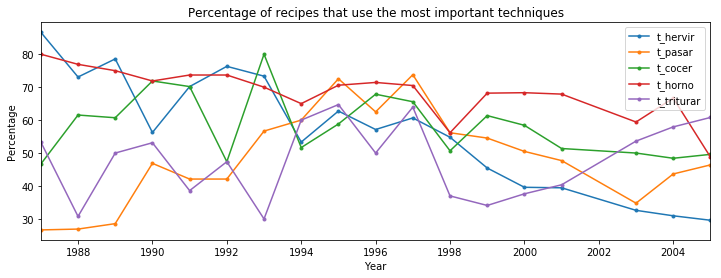

In [24]:
ax = mean_top_techniques_by_year_df.plot(
    figsize=(12, 4),
    title = 'Percentage of recipes that use the most important techniques',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');

Conclusions:<br>
Description of the graphics. (Importance in terms of prediction.)